# Stylized Facts Analysis
### Matt Harrington
---

### Stylized facts:

1.  **Absence of autocorrelations**: (linear) autocorrelations of  asset  returns  are  often  insignificant,  except  for  very small  intraday  time  scales  (20  minutes)  for  which microstructure effects come into play.
2.  **Heavy tails**: the (unconditional) distribution of returnsseems  to  display  a  power-law  or  Pareto-like  tail,  witha  tail  index  which  is  finite,  higher  than  two  and  lessthan  five  for  most  data  sets  studied.   In  particular  this excludes stable laws with infinite variance and the normal distribution.    However  the  precise  form  of  the  tails  is difficult to determine.
3.  **Gain/loss asymmetry**: one observes large drawdowns in stock prices and stock index values but not equally large upward movements
4.  **Aggregational   Gaussianity**: as   one   increases   the time   scaletover   which   returns   are   calculated,their  distribution  looks  more  and  more  like  a  normal distribution.   In particular,  the shape of the distribution is not the same at different time scales.
5. **Intermittency**: returns display, at any time scale, a high degree of variability. This is quantified by the presence of irregular bursts in time series of a wide variety of volatility estimators.
6.  **Volatility  clustering**: different  measures  of  volatility display a positive autocorrelation over several days, which quantifies the fact that high-volatility events tend to clusterin time.
7. $\times$ **Conditional heavy tails**: even after correcting returns for volatility clustering (e.g. via GARCH-type models), the residual time series still exhibit heavy tails. However, the tails are less heavy than in the unconditional distribution of returns.
8. * **Slow decay of autocorrelation in absolute returns**: the autocorrelation function of absolute returns decays slowly as a function of the time lag, roughly as a power law withan exponent $\beta \in [0.2,0.4]$. This is sometimes interpreted as a sign of long-range dependence.
9. ~ **Leverage effect**: most measures of volatility of an asset are negatively correlated with the returns of that asset.
10. **Volume/volatility correlation**: trading volume is correlated with all measures of volatility.
11. * **Asymmetry in time scales**: coarse-grained measures of volatility predict fine-scale volatility better than the otherway round.

#### Ali's feedback:
Make sure to demonstrate empirical, quantitative calculations.
Try to plot the correlations between things like kurtosis. 

### Plumbing

In [8]:
import sys
import os

import importlib
is_colab = importlib.util.find_spec("google")
found = is_colab is not None

import_path = ''
if found:
    from google.colab import drive
    drive.mount('/content/gdrive/', force_remount=True)
    import_path += '/content/gdrive/My Drive/Thesis/pairs/'

else:
    import_path += 'pairs/'

print(import_path)

pairs/


In [9]:
from subsets import *
from coin_helpers import load_coins, simplify
coins, ∏returns = load_coins(import_path, top_50)
day_ret = simplify(returns, '1D')

Log-Returns Head:                           BTC       ETH  BCH  BNB  LINK  DOT  ADA  LTC  EOS  \
open_time                                                                     
2017-08-17 04:01:00  0.000000  0.000000  NaN  NaN   NaN  NaN  NaN  NaN  NaN   
2017-08-17 04:02:00  0.004467 -0.003759  NaN  NaN   NaN  NaN  NaN  NaN  NaN   
2017-08-17 04:03:00 -0.004467  0.000000  NaN  NaN   NaN  NaN  NaN  NaN  NaN   

                     XMR  ...  UMA  ONT  YFI  SNX  FTT  BTT  ALGO  DGB  DOGE  \
open_time                 ...                                                  
2017-08-17 04:01:00  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN   
2017-08-17 04:02:00  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN   
2017-08-17 04:03:00  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN   

                     REN  
open_time                 
2017-08-17 04:01:00  NaN  
2017-08-17 04:02:00  NaN  
2017-08-17 04:03:00  NaN  

[3 rows x 36 columns]


In [10]:
import numpy as np
import pandas as pd

# Generate log returns of ts
np.seterr(divide='ignore')
def log_ret(ts):
    logged = np.log(ts).replace(-np.inf, 0)
    diffed = logged.diff()
    return pd.DataFrame(diffed.dropna(subset=["BTC"]))

# Shows data, autocorrelation, and Dicky-Fuller result
# Credit to this towards data science post: 
# https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775
def tsplot(df, lags=None, figsize=(12, 7), syle='bmh'):    
    if not isinstance(df, pd.Series):
        if 'close' not in df.columns:
            print('Err: Add Closing Prices column')
            return
        y = df['close']
    else: 
        y = df
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        plt.show()
        
# ltc_logret = log_ret(ltc_day)
# tsplot(ltc_logret)

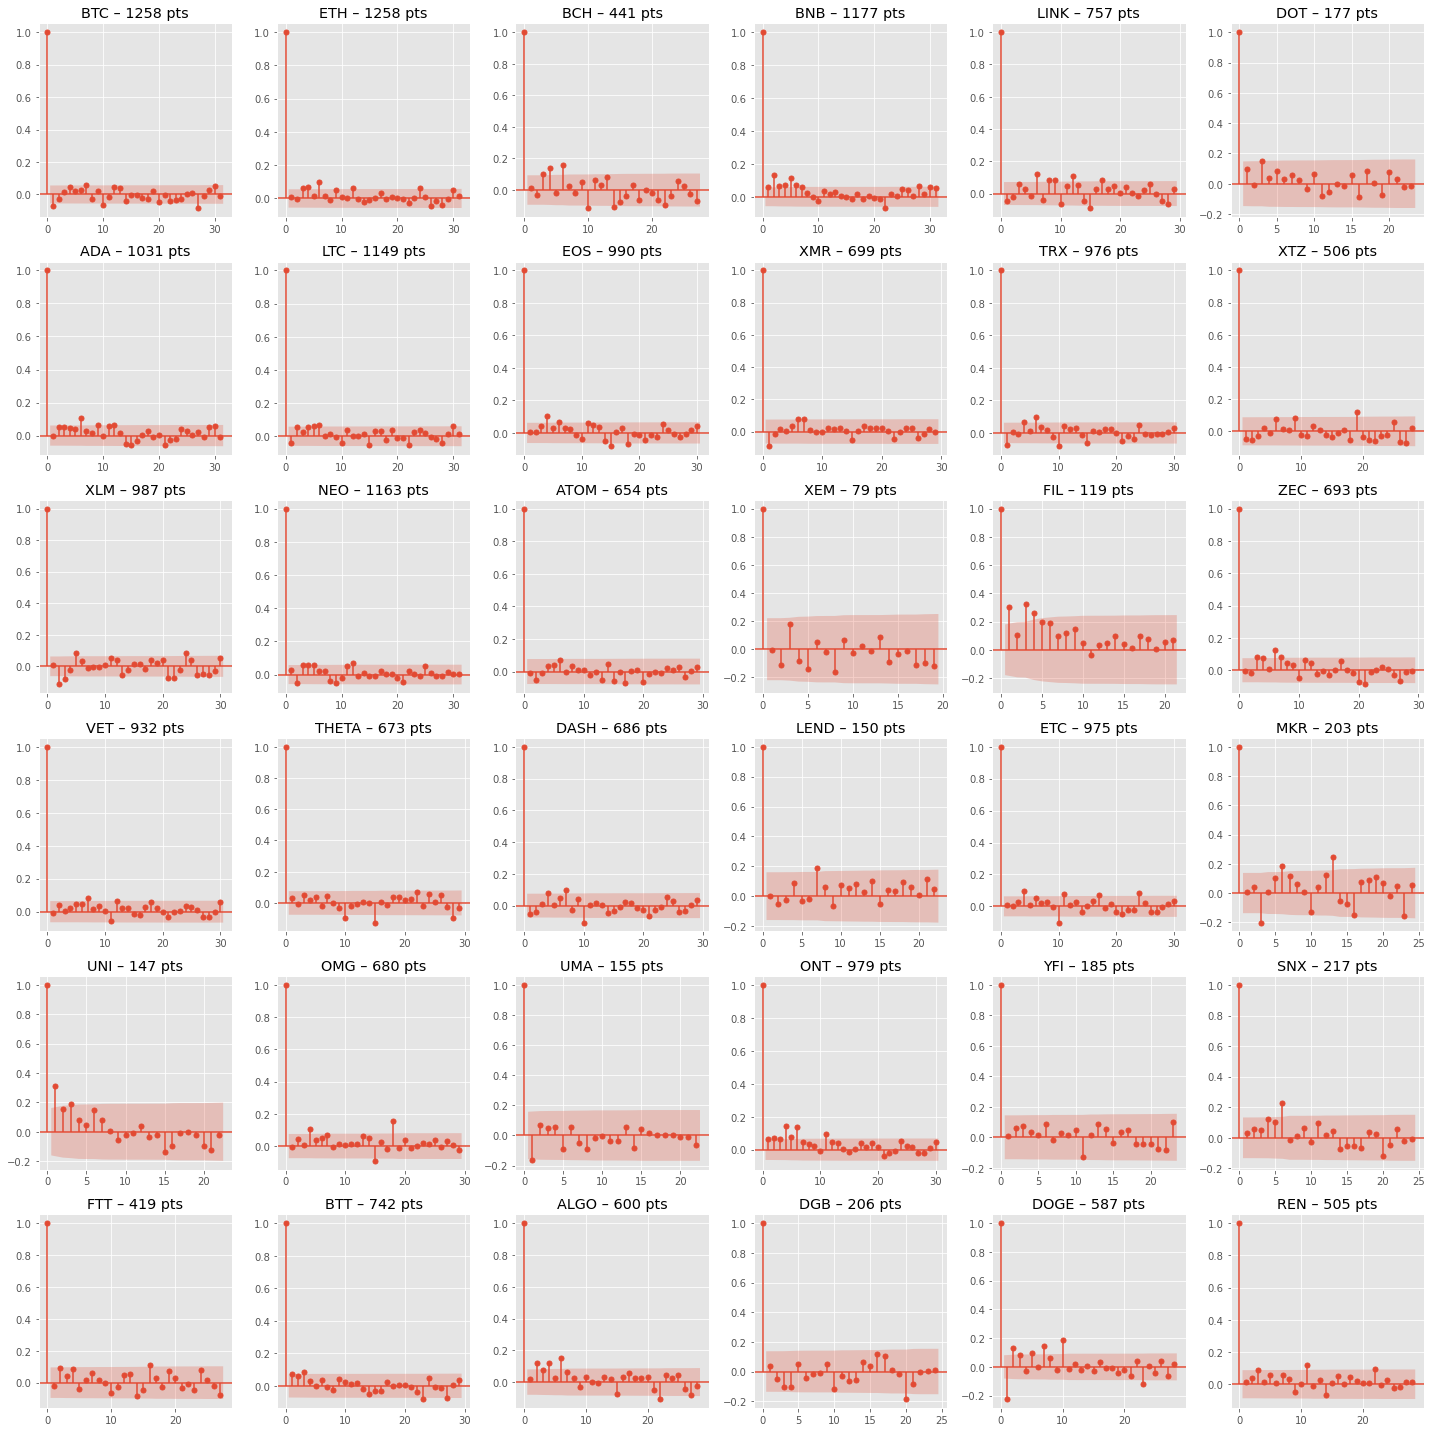

In [11]:
# !pip install statsmodels
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


# Shows data, autocorrelation, and Dicky-Fuller result
# Credit to this towards data science post: https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775
def tsplot(df, lags=None, figsize=(12, 7), syle='bmh', n_rows=6, n_cols=6):

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,20))
    
    for i, c in enumerate(df.columns):

        col = i % n_cols
        row = int((i - col) / n_cols)

        y = df[c].dropna()

        # ax=fig.add_subplot(n_rows,n_cols,i+1)

        smt.graphics.plot_acf(y, lags=lags, ax=axs[row, col])
        axs[row, col].set_title("{} – {} pts".format(c, y.shape[0]))
        
    fig.tight_layout()
    plt.show()

tsplot(simplify(returns, '1D'))

#### Volatility Clustering

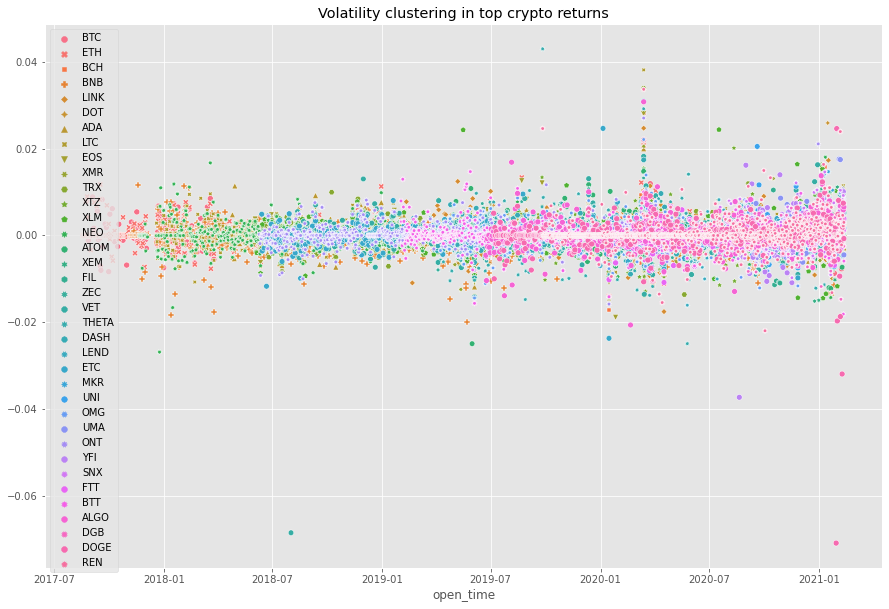

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(data = day_ret, legend='full')
ax.legend()
ax.set_title("Volatility clustering in top crypto returns")
plt.show()

#### Intermittency

(122384, 36) 15min


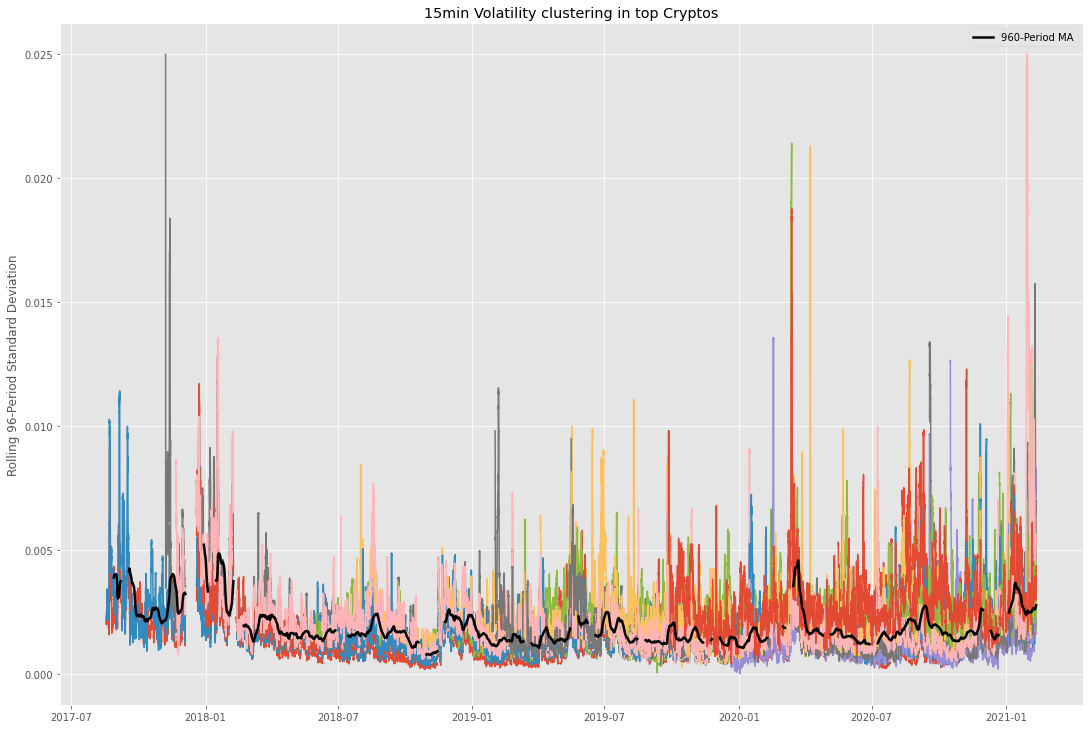

(30596, 36) 1h


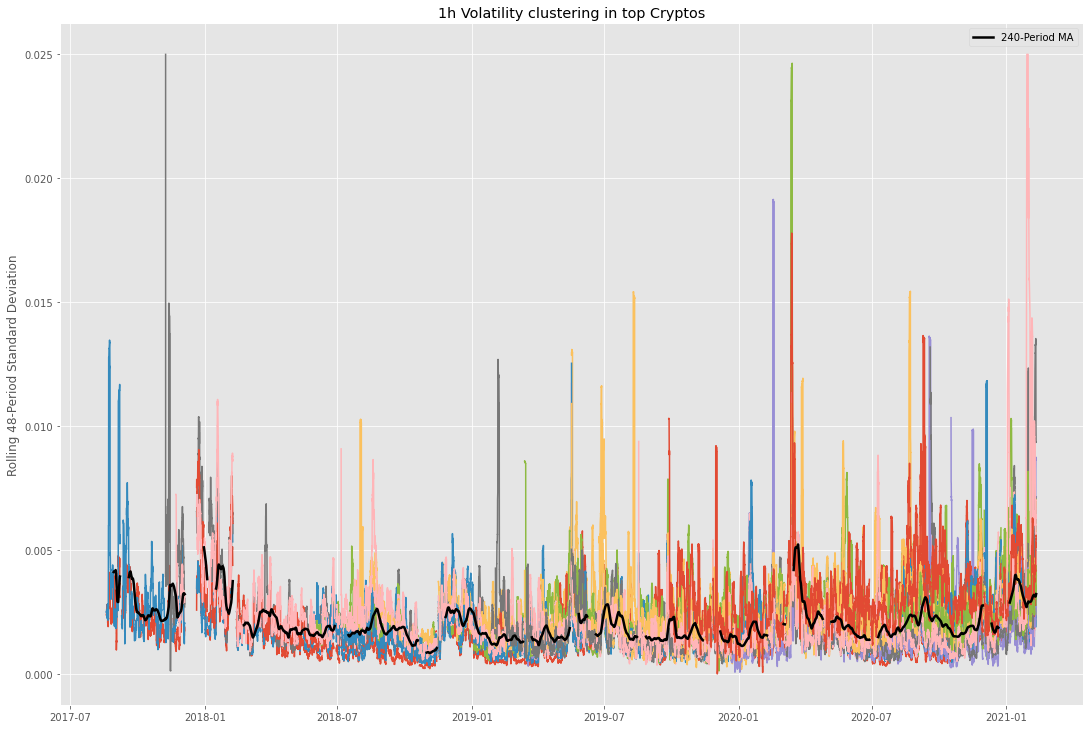

(7649, 36) 4h


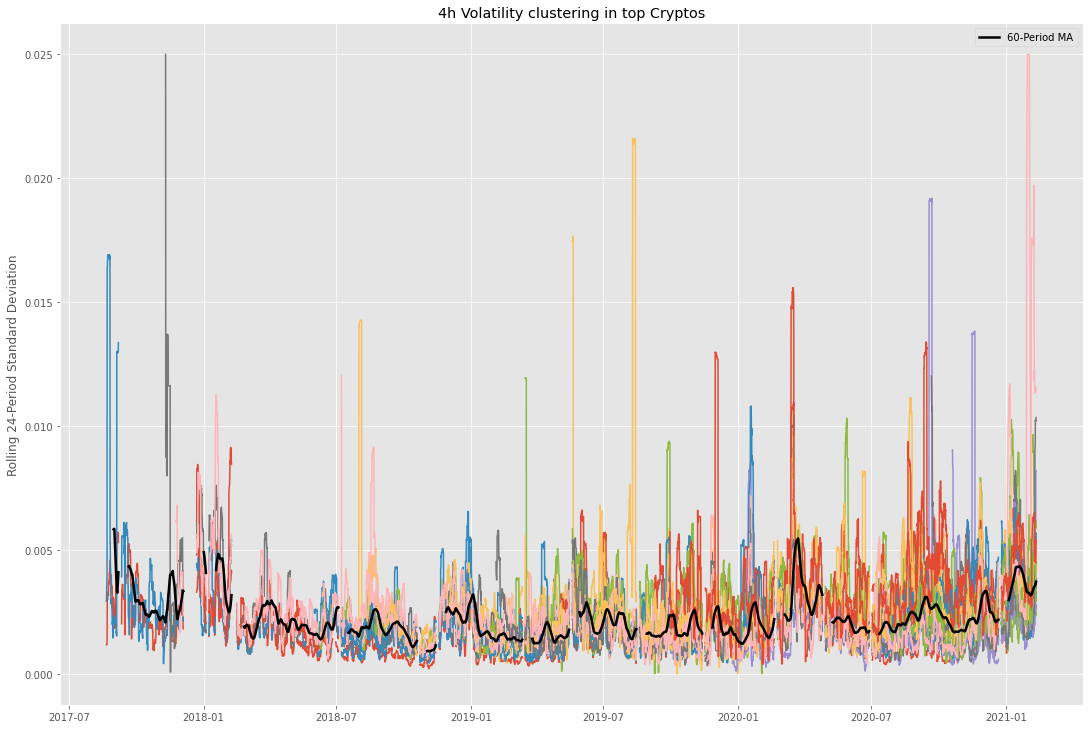

(2550, 36) 12h


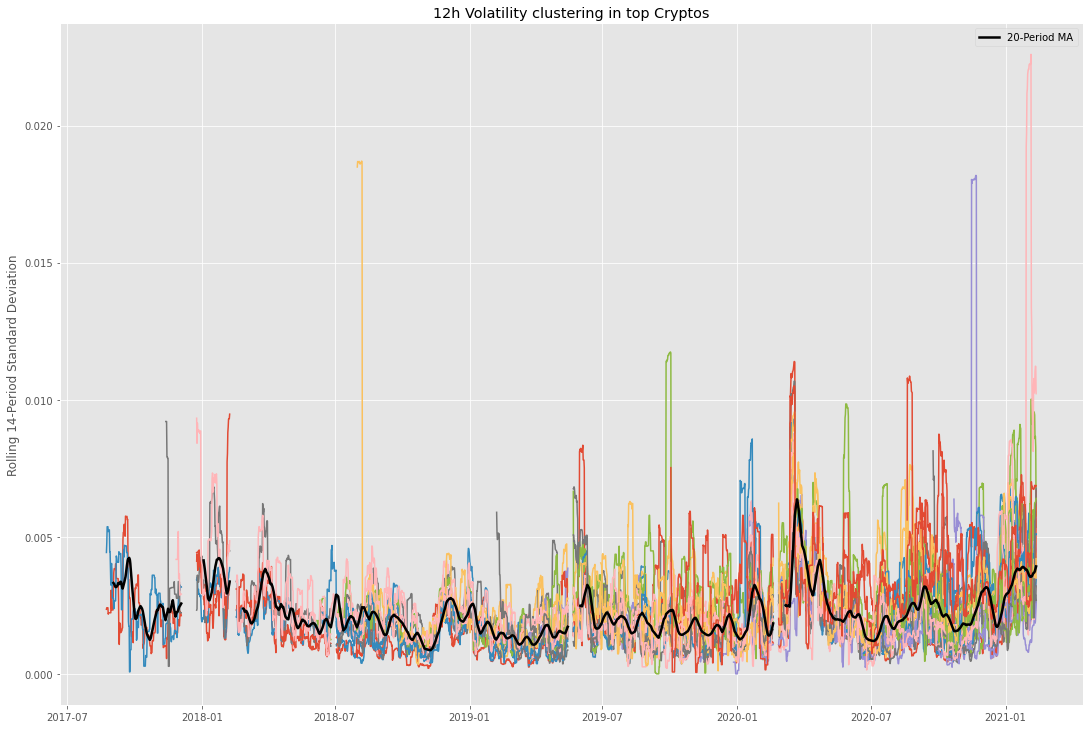

(1275, 36) 1D


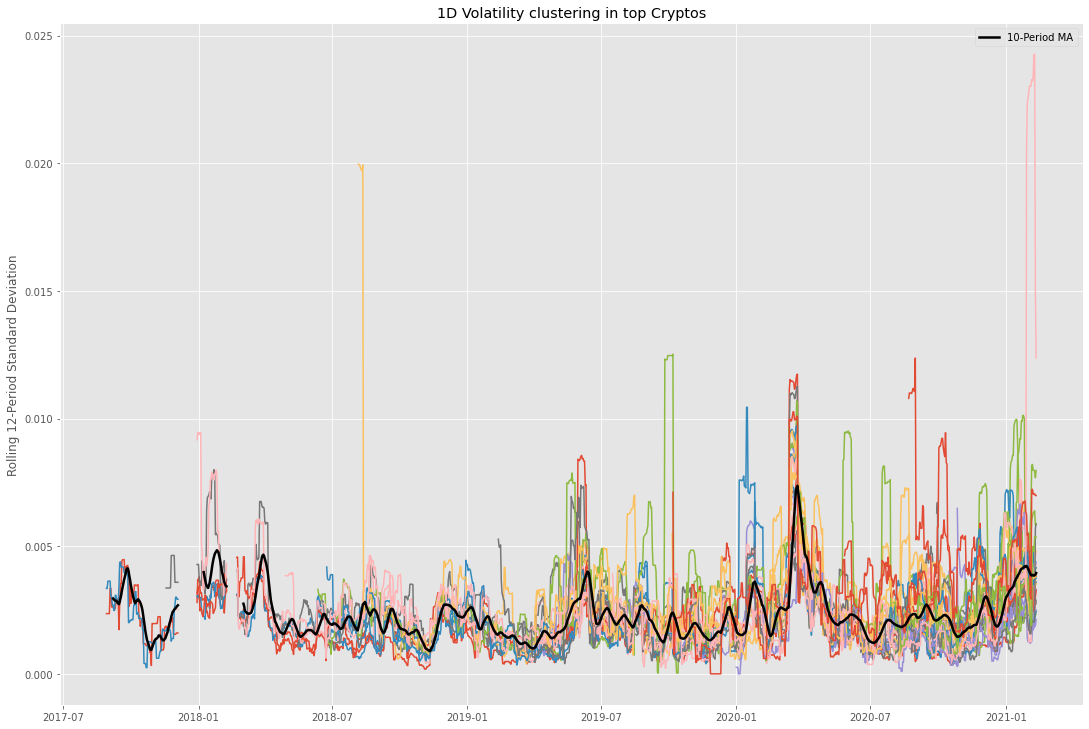

In [13]:
def volatility_ma(intervals, stdwinds, mawinds):

    for i, samp in enumerate(intervals):
        df = simplify(returns, samp)
        df.fillna(0)
        print(df.shape, samp)

        swind, mawind = stdwinds[i], mawinds[i]
        rolled_std = df.rolling(swind).std().clip(upper=0.025)
        # rolled_std = df.rolling(swind).std()
        meanned = rolled_std.mean(axis=1).rolling(mawind).mean()

        fig = plt.figure(figsize=(15,10))
        for c in rolled_std.columns:
            plt.plot(rolled_std[c]) 
        plt.plot(meanned, color='black', lw=2.5, label="{}-Period MA".format(mawind))
        plt.legend()
        plt.tight_layout()
        plt.ylabel("Rolling {}-Period Standard Deviation".format(swind))
        plt.title("{} Volatility clustering in top Cryptos".format(samp))
        plt.show()

volatility_ma(["15min", '1h', '4h', '12h', '1D'],           # resample periods
              [96 * 1, 24 * 2, 6 * 4, 2 * 7, 1 * 12],       # rolling STD window
              [96 * 10, 24 * 10, 6 * 10, 2 * 10, 1 * 10])   # Moving average window


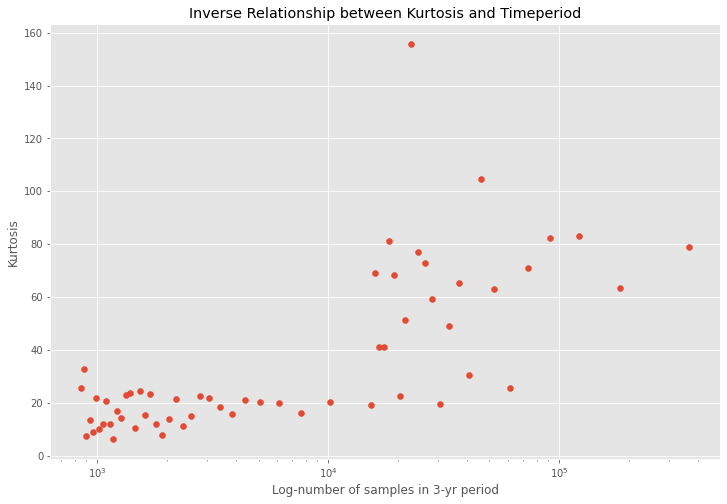

The samllest Kurtosis is 6.33


In [14]:
btc_rets = returns['BTC']
samps = []
for i in range(5, 120, 5):
    samps.append(str(i) + 'min')
for i in range(2, 37):
    samps.append(str(i) + 'h')
v = np.zeros((len(samps), 2))
for i, samp in enumerate(samps):
    btc = simplify(btc_rets, samp)
    pts = btc.shape[0]
    kurt = btc.kurt()
    v[i] = [pts, kurt]

fig = plt.figure(figsize=(12,8))
plt.scatter(v[:,0], v[:,1])
plt.title("Inverse Relationship between Kurtosis and Timeperiod")
plt.ylabel("Kurtosis")
plt.xscale('log')
plt.xlabel("Log-number of samples in 3-yr period")
plt.show()

print("The samllest Kurtosis is {}".format(round(min(v[:,1]), 2)))

#### Aggregational Gaussianity

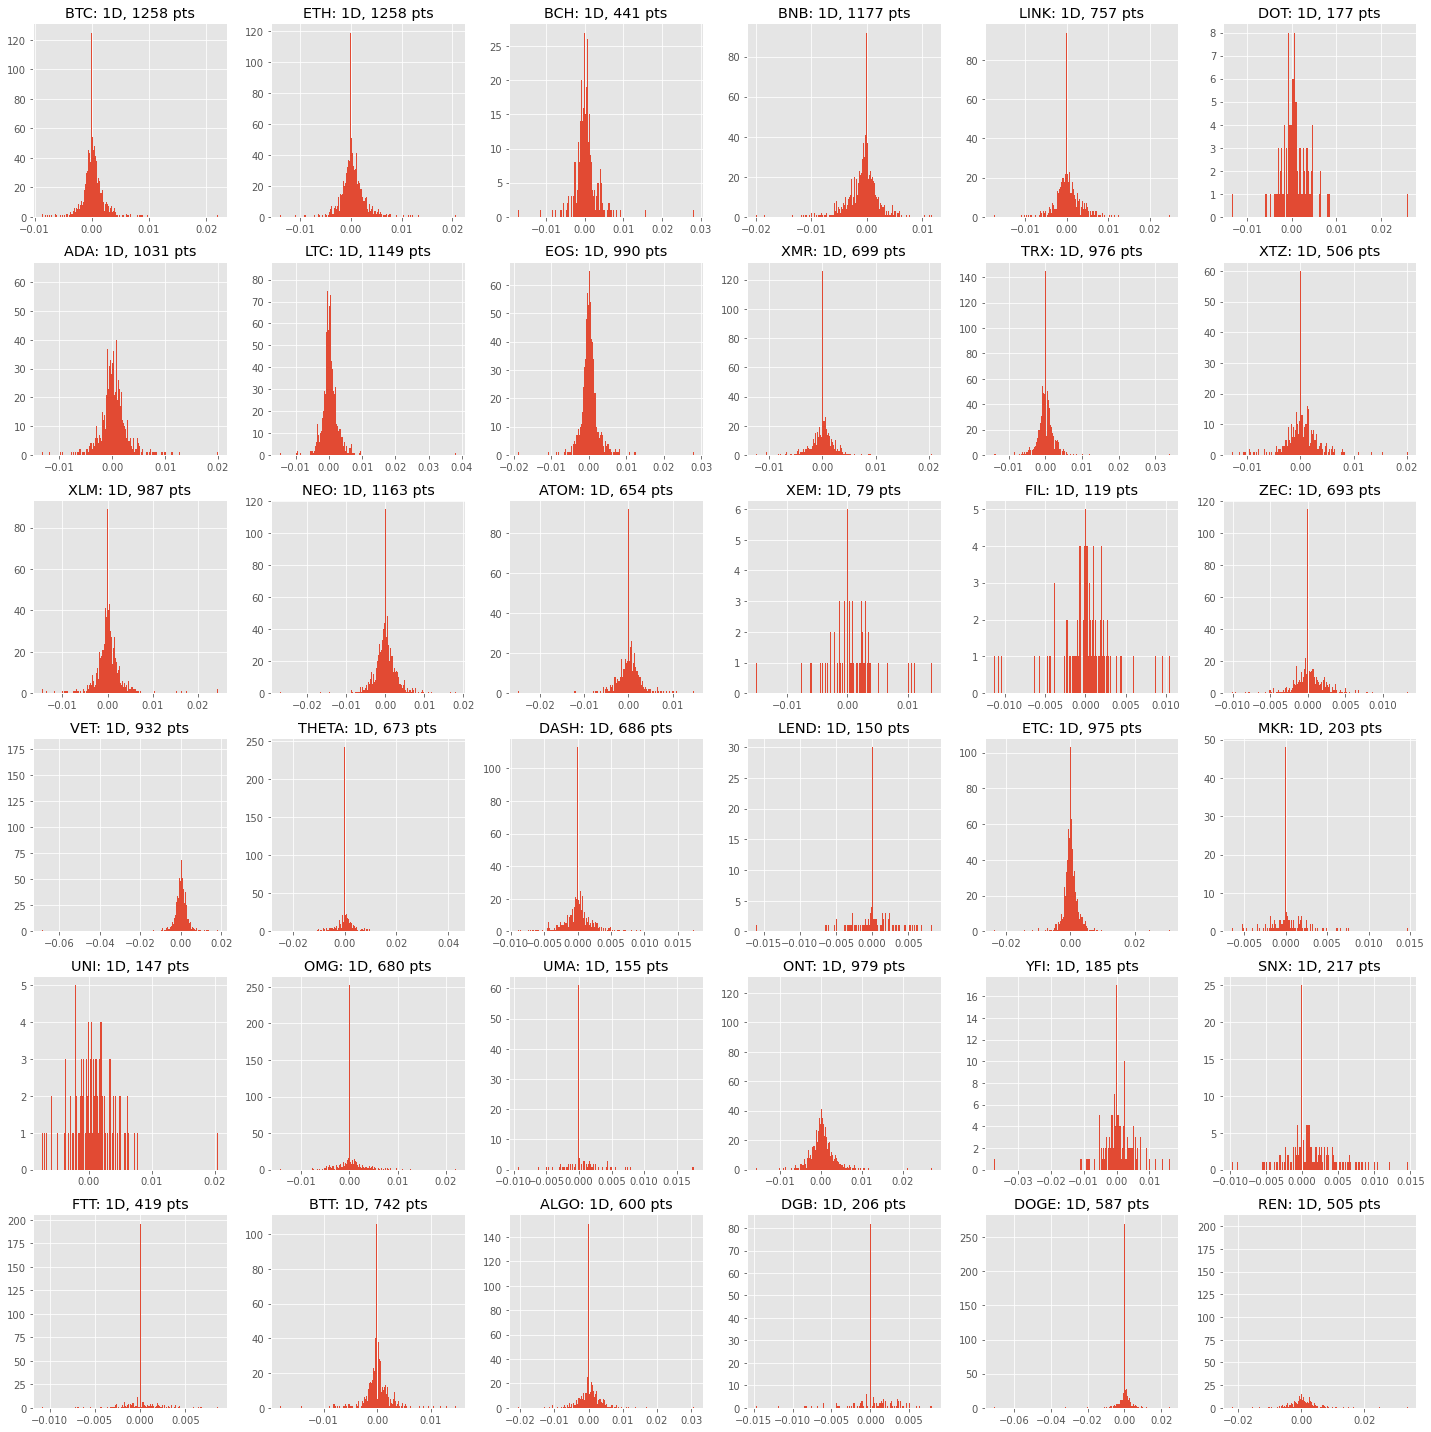

In [15]:
def draw_histograms(df, variables, n_rows, n_cols, resamp_timeframe):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=250,ax=ax)
        nulls = df[var_name].isnull().sum()
        lengs = df[var_name].shape[0]
        ax.set_title("{}: {}, {} pts".format(var_name, resamp_timeframe, lengs - nulls))
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(day_ret, day_ret.columns, 6, 6, '1D')

#### Heavy Tails, Gain/Loss Asymmetry

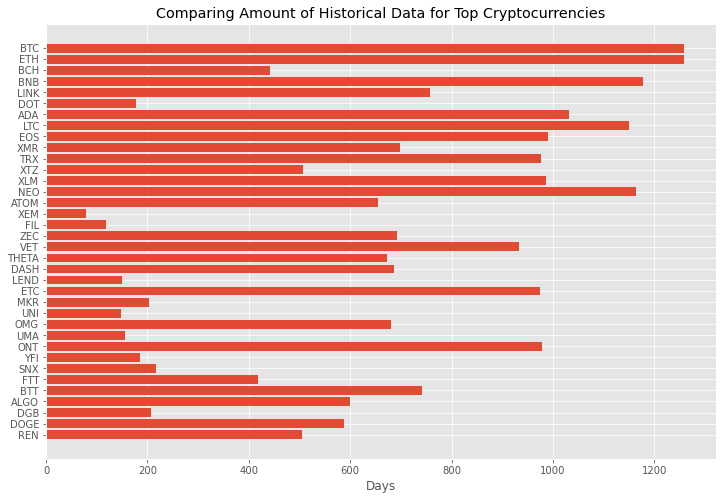

In [16]:
# horizontal bar chart for number of data points exist for each coin

y = day_ret.shape[0] - day_ret.isnull().sum()
new_ind = []
n = len(y.index)
for c in range(0, n):
    i = n - 1 - c
    new_ind.append(y.index[i])
y = y.reindex(index=new_ind)

fig = plt.figure(figsize=(12,8))
plt.barh(y.index, y)
plt.title('Comparing Amount of Historical Data for Top Cryptocurrencies')
plt.xlabel('Days')
plt.show()

In [17]:
thresh = 365
print("{}% of top coins have less than {} days of data".format(round((y > thresh).sum() * 100 / y.shape[0], 2), thresh))

72.22% of top coins have less than 365 days of data


In [18]:
# for_moments
kurt = day_ret.kurt(axis=0)
kurt2 = day_ret.loc[:,~day_ret.columns.isin(['BCH', 'VET'])].kurt(axis=0)
skew = day_ret.skew(axis=0)
skew2 = day_ret.loc[:,~day_ret.columns.isin(['BCH', 'VET'])].skew(axis=0)

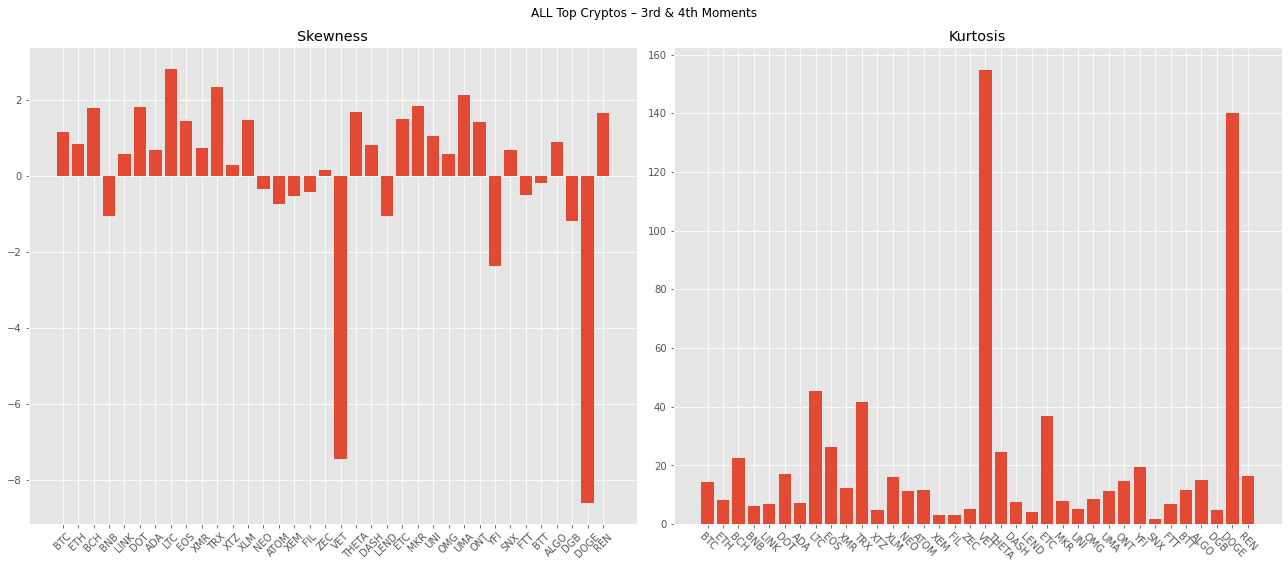

In [19]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharex=True, figsize=(18, 8))

fig.suptitle("ALL Top Cryptos – 3rd & 4th Moments")

skews = ax0.bar(skew.index, skew)
ax0.set_title("Skewness")
ax0.tick_params(axis='x', labelrotation=45)
ax0.grid(True)

kurts = ax1.bar(kurt.index, kurt)
ax1.set_title("Kurtosis")
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid(True)

def autolabel(ax, rects):
    for i, rect in enumerate(rects):
        c = day_ret.columns[i]
        col = day_ret[c]
        
        nulls = col.isnull().sum()
        lengs = col.shape[0]
        
        height = rect.get_height()
        if height < 0: height -= 0.5
        ax.annotate('{}'.format(lengs-nulls),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# autolabel(ax0, skews)
# autolabel(ax1, kurts)

plt.tight_layout()
plt.show()

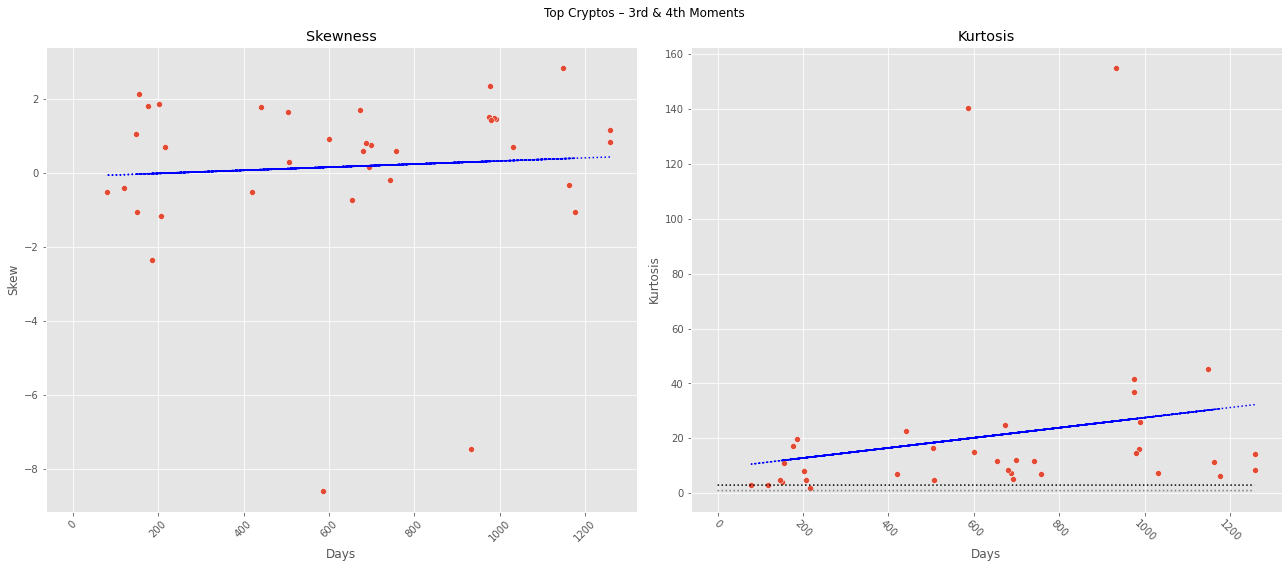

In [20]:
# With all the coins

measures = pd.DataFrame(kurt, columns=['Kurtosis'])
measures['Skew'] = skew
measures['Days'] = day_ret.shape[0] - day_ret.isnull().sum()

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharex=True, figsize=(18, 8))

n = max(measures['Days'])

fig.suptitle("Top Cryptos – 3rd & 4th Moments")
sns.scatterplot(data=measures, x='Days', y='Skew', ax=ax0)
ax0.set_title("Skewness")
ax0.tick_params(axis='x', labelrotation=45)
ax0.grid(True)

z = np.polyfit(measures['Days'], measures['Skew'], 1)
p = np.poly1d(z)
ax0.plot(measures['Days'], p(measures['Days']), c="b", ls=':')

sns.scatterplot(data=measures, x='Days', y='Kurtosis', ax=ax1)
ax1.set_title("Kurtosis")
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid(True)

z = np.polyfit(measures['Days'], measures['Kurtosis'], 1)
p = np.poly1d(z)
ax1.plot(measures['Days'], p(measures['Days']), c="b", ls=':', label="Trend")
ax1.plot(range(0, n), [1]*n, c='grey', ls=':', label="Kurt = 1")
ax1.plot(range(0, n), [3]*n, c='black', ls=':', label='Kurt = 3')

plt.tight_layout()
plt.show()

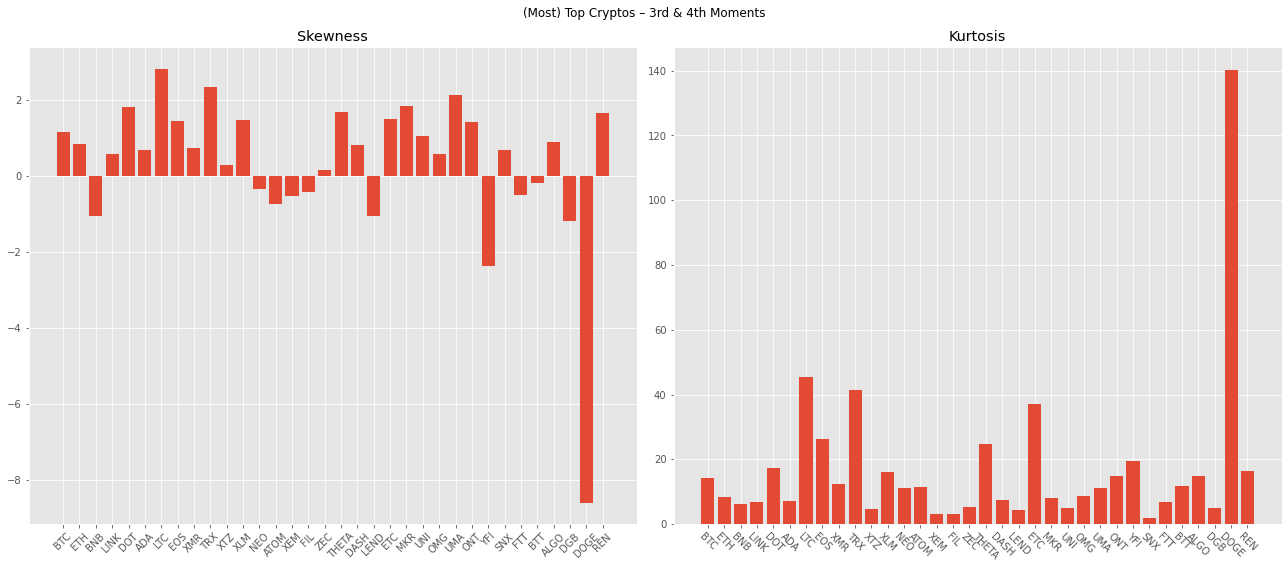

In [21]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharex=True, figsize=(18, 8))
fig.suptitle("(Most) Top Cryptos – 3rd & 4th Moments")
ax0.bar(skew2.index, skew2)
ax0.set_title("Skewness")
ax0.tick_params(axis='x', labelrotation=45)
ax0.grid(True)

ax1.bar(kurt2.index, kurt2)
ax1.set_title("Kurtosis")
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid(True)

plt.tight_layout()
plt.show()

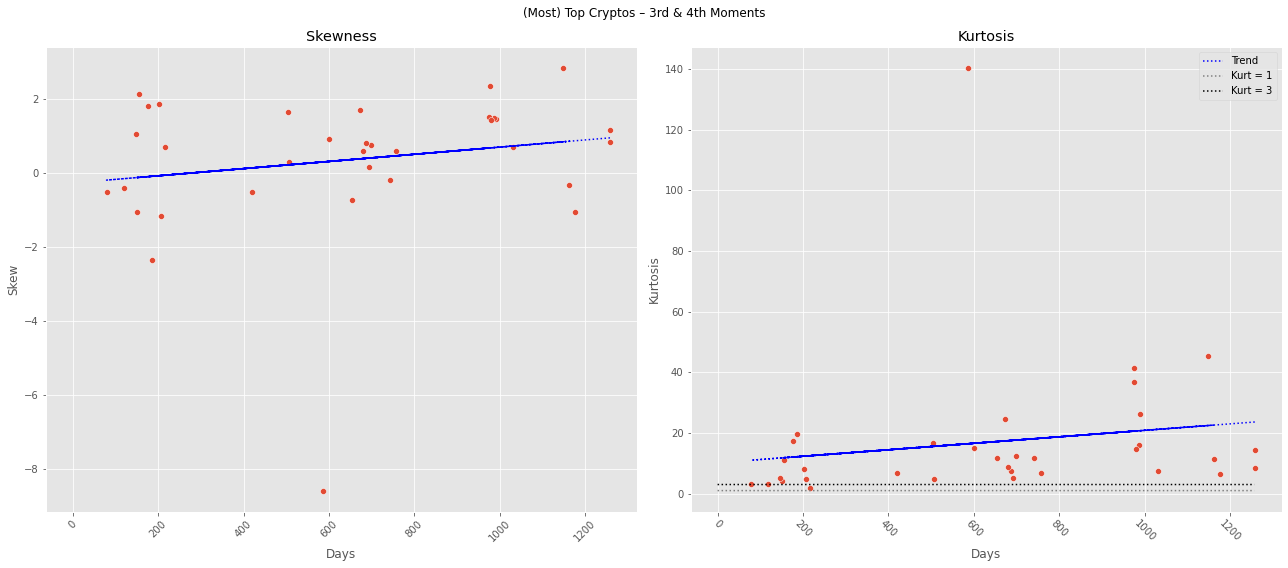

In [22]:
# set up the dataframe
measures = pd.DataFrame(kurt2, columns=['Kurtosis'])
measures['Skew'] = skew2
measures['Days'] = day_ret.shape[0] - day_ret.isnull().sum()

# Prep the plot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharex=True, figsize=(18, 8))
fig.suptitle("(Most) Top Cryptos – 3rd & 4th Moments")

n = max(measures['Days'])

# plot the skew half
sns.scatterplot(data=measures, x='Days', y='Skew', ax=ax0)
ax0.set_title("Skewness")
ax0.tick_params(axis='x', labelrotation=45)
ax0.grid(True)
# Trendline
z = np.polyfit(measures['Days'], measures['Skew'], 1)
p = np.poly1d(z)
ax0.plot(measures['Days'], p(measures['Days']), c="b", ls=':')

# Plot the kurtosis half
sns.scatterplot(data=measures, x='Days', y='Kurtosis', ax=ax1)
ax1.set_title("Kurtosis")
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid(True)
# Trendline
z = np.polyfit(measures['Days'], measures['Kurtosis'], 1)
p = np.poly1d(z)
ax1.plot(measures['Days'], p(measures['Days']), c="b", ls=':', label="Trend")
ax1.plot(range(0, n), [1]*n, c='grey', ls=':', label="Kurt = 1")
ax1.plot(range(0, n), [3]*n, c='black', ls=':', label='Kurt = 3')
ax1.legend()

plt.tight_layout()
plt.show()

#### Conditional Heavy Tails 
###### (ARCH package model does not converge, continues to kill the session by using all RAM)

In [23]:
! pip install arch
from arch import arch_model

     |████████████████████████████████| 788 kB 333 kB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 1.5 MB/s eta 0:00:01


In [24]:
btc = returns['BTC']
eth = returns['ETH']
n = btc.shape[0]
test_size = int(.05 * n)
print("{}/{}".format(n - test_size, test_size))

1716821/90359


In [25]:
def garch(series, test_size):
    train, test = series[:-test_size], series[-test_size:]
    
    model = arch_model(train, p=1, q=1)
    
    model_fit = model.fit()
    
    print(model_fit.summary())
    return model_fit, train, test
    
# eth_model, eth_train, eth_test = garch(eth, test_size)
# btc_model, btc_train, btc_test = garch(btc, test_size)

In [26]:
def predict_garch(model_fit, train, test):
    # Predict
    
    predictions = model_fit.forecast(horizon=test_size)
    
    plt.figure(figsize=(10,4))
    true, = plt.plot(vols[-test_size:])
    preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
    plt.title('Volatility Prediction', fontsize=20)
    plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
    plt.show()
    
    # Rolling Forecast Origin
    
    rolling_predictions = []
    for i in range(test_size):
        train = series[:-(test_size-i)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
    plt.figure(figsize=(10,4))
    true, = plt.plot(vols[-test_size:])
    preds, = plt.plot(rolling_predictions)
    plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
    plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [27]:
# These keep crashing google colab's by using all RAM

# predict_garch(btc_model, btc_train, btc_test)
# predict_garch(eth_model, eth_train, eth_test)

#### Volume / Volatility Correlation

In [28]:
# Resample to given interval
def vol_simplify(ts, interval):
    return ts.resample(interval, label='right', closed='right', axis=0).sum()

In [29]:
# Aggregate all 'volumes' to one df
vols_df = []
for c, f in coins.items():
    vols_df = append_col(f, vols_df, 'volume')

# subsetting the top 50 to only those with stable pairs
top_coins = []
for c in top_50:
    if c in vols_df.columns:
        top_coins.append(c)

vols = vols_df.reindex(columns=top_coins)
vols.head()

NameError: name 'coins' is not defined

In [ ]:
def volume_vs_volatility(vols, rets, samps, subset = []):
    if len(subset):
        v = vols[subset]
        r = rets[subset]
    else: v, r = vols, rets

    for samp in samps:
        vols = vol_simplify(v, samp)
        df = simplify(r, samp)
        df.fillna(0)
        print(df.shape, samp)

        # swind, mawind = stdwinds[i], mawinds[i]
        swind, mawind = 7, 0
        rolled_std = df.rolling(swind).std()
        # rolled_std = df.rolling(swind).std().clip(upper=0.025)
        # meanned = rolled_std.mean(axis=1).rolling(mawind).mean()

        fig = plt.figure(figsize=(15,10))
        for c in rolled_std.columns:
            y = rolled_std[c].dropna(how='all')
            x = vols.loc[y.index][c]
            plt.scatter(x, y) 
        plt.xscale('log')
        # plt.yscale('log')
        plt.title("{} Volatility vs Volume for top {} Coins".format(samp, len(subset)))
        plt.xlabel("Log-scaled trading volume")
        plt.ylabel("Log-Return Volatility")
        plt.show()
    
        print()
        print('==================================================')
        print()

volume_vs_volatility(vols_df, returns, ['1h', '12h', '1D'])
volume_vs_volatility(vols_df, returns, ['1h', '12h', '1D'], oneyr)
volume_vs_volatility(vols_df, returns, ['1h', '12h', '1D'], twoyr)

In [ ]:
def v_vs_v_bar(vols, rets, samps, subset = []):
        
    print()

    if len(subset):
            v = vols[subset]
            r = returns[subset]
    else: v, r = vols, rets

    for samp in samps:
        v = vol_simplify(v, samp)
        df = simplify(r, samp)
        df.fillna(0)
        df = df.rolling(7).std().dropna(how='all')

        corr = {}
        for c in v.columns:
            std = df[c]
            coin_vol = v.loc[std.index][c]
            corr[c] = coin_vol.corr(std)

        fig, ax = plt.subplots(figsize=(12,8))
        plt.bar(corr.keys(), corr.values())
        plt.title("{} Volatility vs Volume Correlation for top {} Coins".format(samp, len(subset)))
        plt.ylabel("Correlation between Volume and Volatility")
        ax.tick_params(axis='x', labelrotation=45)
        plt.show()

        print()
        print('==================================================')
    
    print('==================================================')
    print('==================================================')
    print()

v_vs_v_bar(vols, returns, ['10min', '1h', '1D'])
v_vs_v_bar(vols, returns, ['10min', '1h', '1D'], oneyr)
v_vs_v_bar(vols, returns, ['5min', '1h', '4h', '12h', '1D'], twoyr)

#### Leverage Effect

In [ ]:
def volume_vs_return(vols, rets, samps, subset = []):
    if len(subset):
        v = vols[subset]
        r = rets[subset]
    else: v, r = vols, rets

    for samp in samps:
        vols = vol_simplify(v, samp)
        df = log_ret(r)
        df = simplify(df, samp)
        df.dropna(how='all')

        fig = plt.figure(figsize=(15,10))
        for c in df.columns:
            y = df[c]
            x = vols.loc[y.index][c]
            plt.scatter(x, y) 
        plt.xscale('log')
        plt.title("{} Volatility vs Volume for top {} Coins".format(samp, len(subset)))
        plt.xlabel("Log-scaled trading volume")
        plt.ylabel("Log-Return Volatility")
        plt.show()
    
        print()
        print('==================================================')
        print()

volume_vs_return(vols_df, returns, ['1h', '1D'])
volume_vs_return(vols_df, returns, ['1h', '1D'], oneyr)
volume_vs_return(vols_df, returns, ['5min', '1h', '12h', '1D'], twoyr)

In [ ]:
def vol_vs_ret_bar(vols, rets, samps, subset = []):
        
    print()

    if len(subset):
        v = vols[subset]
        r = returns[subset]
    else: v, r = vols, rets

    for samp in samps:
        v = vol_simplify(v, samp)
        df = log_ret(r)
        df = simplify(df, samp)
        df.fillna(0)

        corr = {}
        for c in df.columns:
            y = df[c]
            coin_vol = v.loc[y.index][c]
            corr[c] = coin_vol.corr(y)

        fig, ax = plt.subplots(figsize=(12,8))
        plt.bar(corr.keys(), corr.values())
        plt.title("{} Volatility vs Returns Correlation for top {} Coins".format(samp, len(df.columns)))
        plt.ylabel("Correlation between Volume and Volatility")
        ax.tick_params(axis='x', labelrotation=45)
        plt.show()

        print()
        print('==================================================')
    
    print('==================================================')
    print('==================================================')
    print()

v_vs_v_bar(vols, returns, ['10min', '1h', '1D'])
v_vs_v_bar(vols, returns, ['10min', '1h', '1D'], oneyr)
v_vs_v_bar(vols, returns, ['5min', '1h', '4h', '12h', '1D'], twoyr)